# Transformer Tokenizers

> Comparing Transformer Tokenizers
> ref: https://colab.research.google.com/drive/1cPxYzWFZ99e64WaWPCJumdZfkxDjGiEI

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [tokenizer]
- hide: false
- search_exclude: true

## Word2Vec and GloVe dictionary download

In [1]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz" 
!wget -P /root/input/ -c "http://nlp.stanford.edu/data/glove.6B.zip" 

--2020-05-18 11:25:09--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.243.54
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.243.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  34.6MB/s    in 46s     

2020-05-18 11:25:56 (34.2 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]

--2020-05-18 11:25:57--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-05-18 11:25:57--  https://nlp.stanford.edu/data/glove.6B.z

In [2]:
!unzip '/root/input/glove.6B.zip'

Archive:  /root/input/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [3]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.300d.txt'
word2vec_output_file = 'glove.6B.300d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(400000, 300)

In [4]:
from gensim.models import KeyedVectors
import gensim
WORD2WEC_EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz' # from above
word2vec = KeyedVectors.load_word2vec_format(WORD2WEC_EMBEDDING_FILE, binary=True)
#word2vec30k = KeyedVectors.load_word2vec_format(WORD2WEC_EMBEDDING_FILE, binary=True, limit=30000)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [5]:
glove = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## HuggingFace Transformers

In [6]:
!pip install transformers -q
from transformers import *

     |████████████████████████████████| 645kB 10.3MB/s 
     |████████████████████████████████| 1.1MB 24.2MB/s 
     |████████████████████████████████| 3.8MB 37.1MB/s 
     |████████████████████████████████| 890kB 47.3MB/s 


In [7]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/models.huggingface.co/bert/xlm-mlm-en-2048-vocab.json"
!wget -P /root/input/ -c "https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-xl-vocab.json"
!wget -P /root/input/ -c "https://s3.amazonaws.com/models.huggingface.co/bert/roberta-base-vocab.json"

--2020-05-18 11:37:11--  https://s3.amazonaws.com/models.huggingface.co/bert/xlm-mlm-en-2048-vocab.json
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.27.70
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.27.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 646181 (631K) [application/json]
Saving to: ‘/root/input/xlm-mlm-en-2048-vocab.json’

xlm-mlm-en-2048-voc 100%[===================>] 631.04K  1.44MB/s    in 0.4s    

2020-05-18 11:37:12 (1.44 MB/s) - ‘/root/input/xlm-mlm-en-2048-vocab.json’ saved [646181/646181]

--2020-05-18 11:37:14--  https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-xl-vocab.json
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.160.237
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.160.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1042301 (1018K) [application/json]
Saving to: ‘/root/input/gpt2-xl-vocab.json’

gpt2-xl-vocab.json  100%[===================>]   1018

## GPT-2 and RoBERTa shares the same vocabulary in HuggingFace

In [0]:
import json

In [0]:
with open('/root/input/roberta-base-vocab.json', encoding="utf-8") as json_file:
    roberta_data = json.load(json_file)

In [0]:
with open('/root/input/gpt2-xl-vocab.json', encoding="utf-8") as json_file:
    gpt2_data = json.load(json_file)

Removing special characters

In [0]:
replacer = lambda x: x.replace('\u0120', "")
roberta_data = list(map(replacer, roberta_data))
gpt2_data = list(map(replacer, gpt2_data))

Vocabulary comparison

In [0]:
def get_vocab_sim(first_vocab_keys, second_vocab_keys):
    f_set = set(first_vocab_keys)
    s_set = set(second_vocab_keys)
    intersection = f_set.intersection(s_set)
    return intersection, len(intersection)/len(f_set), len(intersection)/len(s_set)

In [13]:
_, f, s = get_vocab_sim(roberta_data, gpt2_data)
print(f, s)

0.9998082730192206 1.0


## Comparing Tokenizer vocabularies

In [0]:
import json

Removing special characters

In [0]:
replacer = lambda x: x.replace('\u0120', "")
replacer2 = lambda x: x.replace('##', "")
replacer3 = lambda x: x.replace("</w>", "")
#gpt2_data = list(map(replacer, gpt2_data))

Loading models and vocabularies

In [16]:
bert_uncased = BertTokenizer.from_pretrained('bert-base-uncased')
bert_cased = BertTokenizer.from_pretrained('bert-base-cased')
bert_multi = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
xlm = XLMTokenizer.from_pretrained('xlm-mlm-en-2048')
gpt2 = GPT2Tokenizer.from_pretrained('gpt2')

with open('/root/input/gpt2-xl-vocab.json', encoding="utf-8") as json_file:
    gpt2_data = json.load(json_file)
    
with open('/root/input/xlm-mlm-en-2048-vocab.json', encoding="utf-8") as json_file:
    xlm_data = json.load(json_file)

Removing special characters

In [0]:
bert_uncased_woc = list(map(replacer2, bert_uncased.vocab.keys()))
bert_cased_woc = list(map(replacer2, bert_cased.vocab.keys()))
bert_multi_woc = list(map(replacer2, bert_multi.vocab.keys()))

gpt2_data_woc = list(map(replacer, gpt2_data.keys()))

xlm_data_woc = list(map(replacer3, xlm_data.keys()))

word2vec_woc = list(map(replacer2, word2vec.vocab.keys()))
glove_woc = list(map(replacer2, glove.vocab.keys()))

Comparing vocabularies

In [18]:
first_vocab = bert_cased_woc

_, f, s = get_vocab_sim(first_vocab, bert_cased_woc)
print(f, s)
_, f, s = get_vocab_sim(first_vocab, bert_uncased_woc)
print(f, s)
_, f, s = get_vocab_sim(first_vocab, bert_multi_woc)
print(f, s)
_, f, s = get_vocab_sim(first_vocab, xlm_data_woc)
print(f, s)
_, f, s = get_vocab_sim(first_vocab, gpt2_data_woc)
print(f, s)
_, f, s = get_vocab_sim(first_vocab, word2vec_woc)
print(f, s)
_, f, s = get_vocab_sim(first_vocab, glove_woc)
print(f, s)

1.0 1.0
0.6391771821100575 0.6155754503289829
0.658067647278429 0.16918617485866758
0.5847830956469797 0.574551590067124
0.78772493093407 0.5057768828802914
0.8769133129246621 0.007851291741219232
0.6091241693421937 0.04079010197525494


## Tokenizer Differences

In [23]:
same_words = 0
wrong_words = 0
wrong_word_counter_list = []
for word in list(word2vec.vocab.keys())[:10000]:
    word = word.lower()
    bert_uncased_token = bert_uncased.tokenize(word)
    bert_uncased_token = list(map(replacer2, bert_uncased_token))
    bert_cased_token = bert_cased.tokenize(word)
    bert_cased_token = list(map(replacer2, bert_cased_token))
    bert_multi_token = bert_multi.tokenize(word)
    bert_multi_token = list(map(replacer2, bert_multi_token))
    gpt2_token = gpt2.tokenize(word)
    gpt2_token = list(map(replacer, gpt2_token))
    xlm_token = xlm.tokenize(word)
    xlm_token = list(map(replacer3, xlm_token))
    # if len(bert_uncased_token) == 1 and len(bert_multi_token) == 1 and len(gpt2_token) == 1 and len(xlm_token) == 1:
    #    same_words += 1
    if bert_uncased_token == bert_cased_token and bert_uncased_token == bert_multi_token and bert_uncased_token == gpt2_token and bert_uncased_token == xlm_token:
        same_words += 1
    else:
        wrong_words += 1
        #print(bert_uncased_token, bert_cased_token, bert_multi_token, gpt2_token, xlm_token)
    wrong_word_counter_list.append(same_words)
print(same_words)
print(wrong_words)

3055
6945


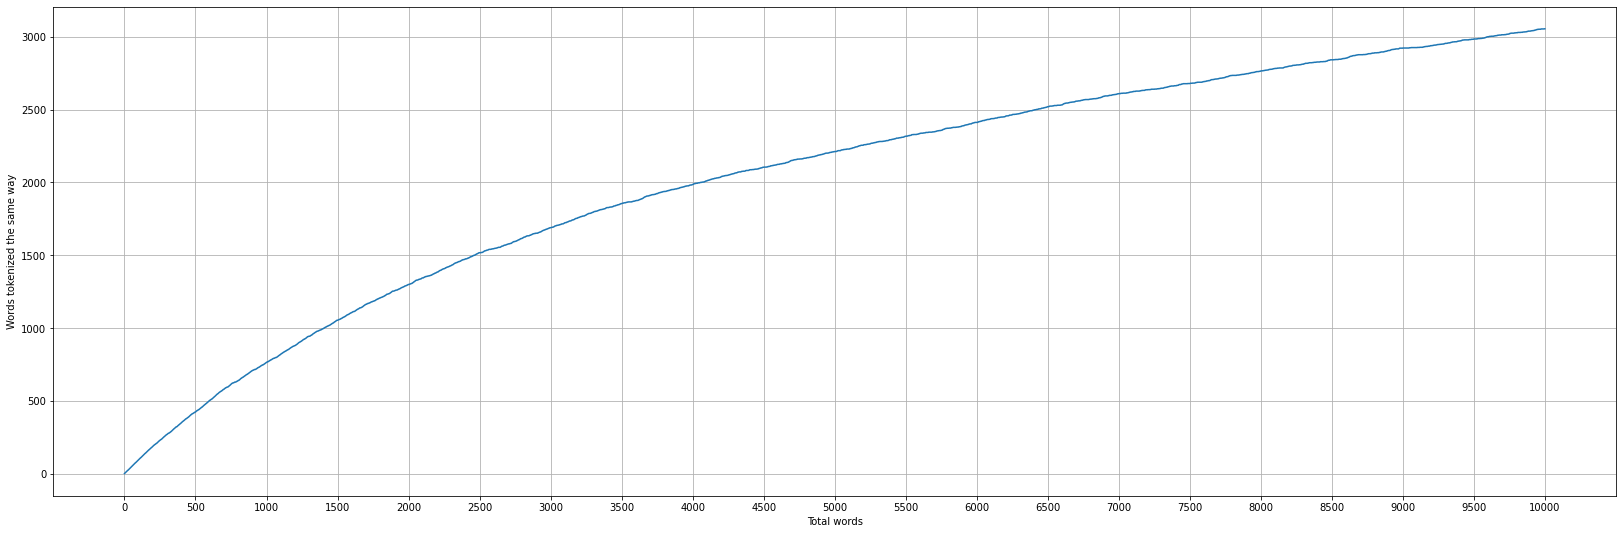

In [24]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(28,9))
minor_ticks = np.arange(0, 11000, 500)
plt.xticks(minor_ticks)
plt.grid()
plt.xlabel("Total words")
plt.ylabel("Words tokenized the same way")
plt.plot(wrong_word_counter_list[:10000])
plt.show()

['Marion'] ['marion'] ['Marion'] ['Mar', 'ion'] ['marion']

All: 2184

Lower: 3055

['b', 'ap', 'tist'] ['baptist'] ['ba', 'ptis', 't'] ['b', 'apt', 'ist'] ['baptist']

['n', 'ug', 'gets'] ['nu', 'gg', 'ets'] ['nu', 'gge', 'ts'] ['n', 'uggets'] ['nu', 'g', 'gets']

763

In [26]:
bert_cased.tokenize("tokenization")

['token', '##ization']

In [27]:
gpt2.tokenize("tokenization")

['token', 'ization']

In [28]:
xlm.tokenize("tokenization")

['to', 'ken', 'ization</w>']